#OEIT6 - Data Analytics

Experiment 7: Understanding Support Vector Machine algorithm through building SVM algorithm in Python
 
Name: Sara Sheth

UID: 2019120058


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

In [ ]:
# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

In [ ]:
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
# Learn to predict each class against the other
classifier = OneVsRestClassifier(
    svm.SVC(kernel="linear", probability=True, random_state=random_state)
)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [ ]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

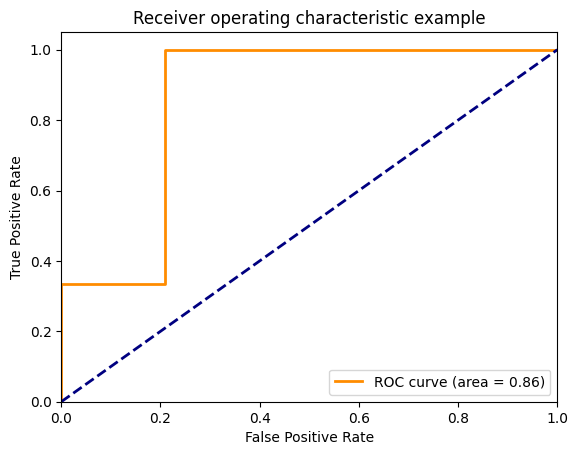

In [ ]:
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()


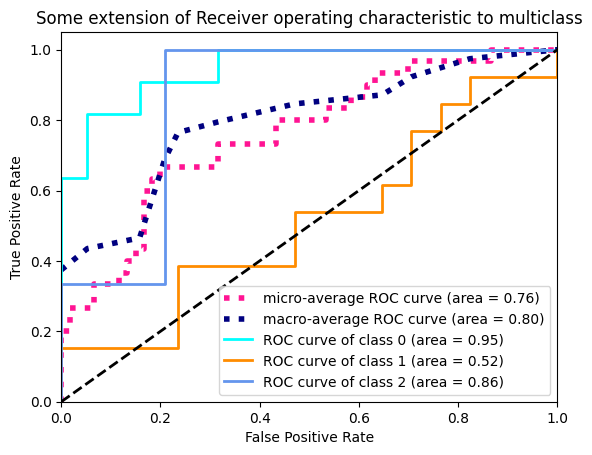

In [ ]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()


In [ ]:
y_prob = classifier.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(
    y_test, y_prob, multi_class="ovo", average="weighted"
)
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(
    y_test, y_prob, multi_class="ovr", average="weighted"
)
print(
    "One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo)
)
print(
    "One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr)
)

One-vs-One ROC AUC scores:
0.774772 (macro),
0.743120 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.774772 (macro),
0.743120 (weighted by prevalence)


# Inference:

What is the Support Vector Machine?

Support Vector Machine” (SVM) is a supervised machine learning algorithm that can be used for both classification or regression challenges. However,  it is mostly used in classification problems. In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is a number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiates the two classes very well (look at the below snapshot).

![alternatvie text](https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_1.png)

How does it work?

Let’s understand:

Identify the right hyper-plane (Scenario-1): 

![alternatvie text](https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_21.png)

Here, we have three hyper-planes (A, B, and C). Now, identify the right hyper-plane to classify stars and circles.
You need to remember a thumb rule to identify the right hyper-plane: “Select the hyper-plane which segregates the two classes better”. In this scenario, hyper-plane “B” has excellently performed this job.


Identify the right hyper-plane (Scenario-2): 

![alternatvie text](https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_3.png)

Here, we have three hyper-planes (A, B, and C) and all are segregating the classes well. Now, How can we identify the right hyper-plane?
Here, maximizing the distances between nearest data point (either class) and hyper-plane will help us to decide the right hyper-plane. This distance is called as Margin. Let’s look at the below snapshot:SVM_4
Above, you can see that the margin for hyper-plane C is high as compared to both A and B. Hence, we name the right hyper-plane as C. Another lightning reason for selecting the hyper-plane with higher margin is robustness. If we select a hyper-plane having low margin then there is high chance of miss-classification.

Identify the right hyper-plane (Scenario-3):

![alternatvie text](https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_4.png)

Hint: Use the rules as discussed in previous section to identify the right hyper-plane. Some of you may have selected the hyper-plane B as it has higher margin compared to A. But, here is the catch, SVM selects the hyper-plane which classifies the classes accurately prior to maximizing margin. Here, hyper-plane B has a classification error and A has classified all correctly. Therefore, the right hyper-plane is A.

Can we classify two classes (Scenario-4)?: 

![alternatvie text](https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_5.png)

Below, I am unable to segregate the two classes using a straight line, as one of the stars lies in the territory of other(circle) class as an outlier. 

![alternatvie text](https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_61.png)

As I have already mentioned, one star at other end is like an outlier for star class. The SVM algorithm has a feature to ignore outliers and find the hyper-plane that has the maximum margin. Hence, we can say, SVM classification is robust to outliers.

![alternatvie text](https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_71.png)

Find the hyper-plane to segregate to classes (Scenario-5): 

In the scenario below, we can’t have linear hyper-plane between the two classes, so how does SVM classify these two classes? Till now, we have only looked at the linear hyper-plane.

![alternatvie text](https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_8.png)  

SVM can solve this problem. Easily! It solves this problem by introducing additional feature. Here, we will add a new feature z=x^2+y^2. Now, let’s plot the data points on axis x and z:

![alternatvie text](https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_9.png)

In above plot, points to consider are:
All values for z would be positive always because z is the squared sum of both x and y
In the original plot, red circles appear close to the origin of x and y axes, leading to lower value of z and star relatively away from the origin result to higher value of z.
In the SVM classifier, it is easy to have a linear hyper-plane between these two classes. But, another burning question which arises is, should we need to add this feature manually to have a hyper-plane. No, the SVM  algorithm has a technique called the kernel trick. The SVM kernel is a function that takes low dimensional input space and transforms it to a higher dimensional space i.e. it converts not separable problem to separable problem. It is mostly useful in non-linear separation problem. Simply put, it does some extremely complex data transformations, then finds out the process to separate the data based on the labels or outputs you’ve defined.

When we look at the hyper-plane in original input space it looks like a circle:

![alternatvie text](https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_10.png)

__Pros and Cons associated with SVM__

Pros:
It works really well with a clear margin of separation
It is effective in high dimensional spaces.
It is effective in cases where the number of dimensions is greater than the number of samples.
It uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
Cons:
It doesn’t perform well when we have large data set because the required training time is higher
It also doesn’t perform very well, when the data set has more noise i.e. target classes are overlapping
SVM doesn’t directly provide probability estimates, these are calculated using an expensive five-fold cross-validation. It is included in the related SVC method of Python scikit-learn library.